In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX 
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import ipywidgets as widgets
from IPython.display import display
from IPython.display import HTML

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Reading Dataframe
df = pd.read_csv('/Users/devonmarcus/Data Science Bootcamp/Ticketmaster Project/data/Event_Information_Dataframe_Part_4.csv', sep='\t')
df.drop("Unnamed: 0", axis=1, inplace=True)
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [3]:
# Making Ajustments to row and columns
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str).str.zfill(2)
df['Day'] = df['Day'].astype(str).str.zfill(2)
df["Date"] = df["Year"] + df["Month"] + df["Day"]
df['Date'] = df['Date'].astype(int)
df = df[df['Home_Name'].notna()]
df = df[df['Genre_Home'].notna()]

df = df.loc[(df['Segment_Home'] == 'Music')]

In [4]:
# Taking Sub Segments of Dataframe 
df_Price = df.iloc[: , [27,55,26]]
df_Avg_Price = df.iloc[: , [55]]
df_Numerical_Values = df.iloc[: , [46,52,36,37,38,39]]

In [5]:
# Turning Non NaN into 1 and All NaN to 0
Social = df.iloc[: , [31,40,41,42,43,44,45,47,48,49,50,51]]
Social = Social.notnull().astype('int')
Away = df.iloc[: , [11,12,13,14, 17,18,19,20]]
Away = Away.notnull().astype('int')

In [6]:
# Merging Dataframe For Correlation Analysis
df_Away_Social = pd.merge(Away, Social, left_index=True, right_index=True)
df_Away_Social_Numerical = pd.merge(df_Numerical_Values, df_Away_Social, left_index=True, right_index=True)
df_Away_Social_Numerical_Price = pd.merge(df_Avg_Price, df_Away_Social_Numerical, left_index=True, right_index=True)

In [7]:
# Fixing NaN Values
df_Away_Social_Numerical = df_Away_Social_Numerical.fillna(df_Away_Social_Numerical.mean())

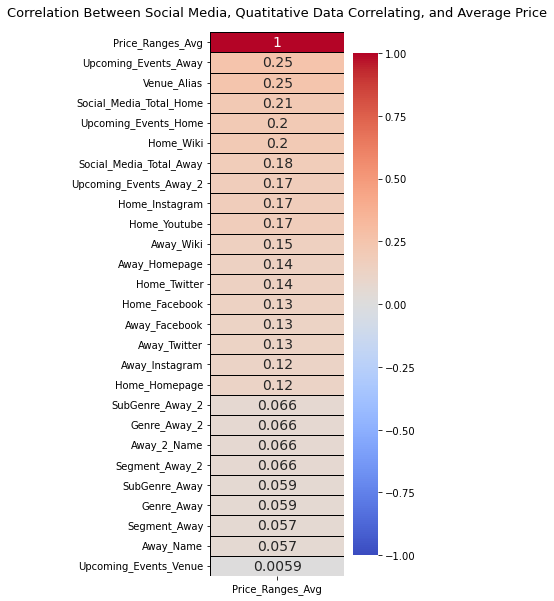

In [8]:
# Features Correlating (Away_Social_Numerical) with Average Price
plt.figure(figsize=(3, 10))
heatmap = sns.heatmap(df_Away_Social_Numerical_Price.corr()[['Price_Ranges_Avg']].sort_values(by='Price_Ranges_Avg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={'fontsize': 14},linewidths = 1,linecolor = 'Black')
heatmap.set_title('Correlation Between Social Media, Quatitative Data Correlating, and Average Price', fontdict={'fontsize':13}, pad=16);

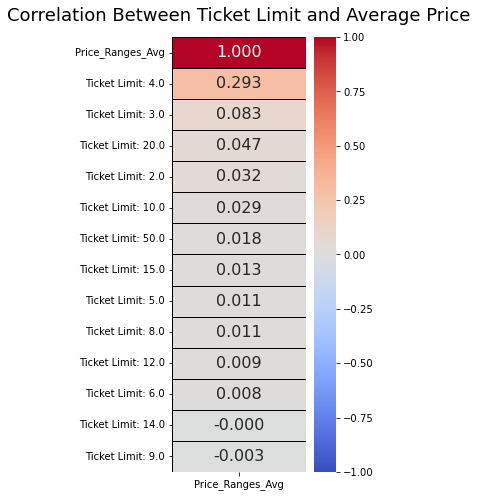

In [9]:
# Features Correlating (Ticket Limit) with Average Price
Ticket_Limit_Dummies = pd.get_dummies(df['Ticket_Limit'],prefix_sep=': ',prefix='Ticket Limit',drop_first = False)
Ticket_Limit_Dummies = pd.merge(Ticket_Limit_Dummies, df['Price_Ranges_Avg'], left_index=True, right_index=True)
plt.figure(figsize=(3, 8))
heatmap = sns.heatmap(Ticket_Limit_Dummies.corr()[['Price_Ranges_Avg']].sort_values(by='Price_Ranges_Avg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={'fontsize': 16},linewidths = 1,linecolor = 'Black',fmt=".3f")
heatmap.set_title('Correlation Between Ticket Limit and Average Price', fontdict={'fontsize':18}, pad=16);

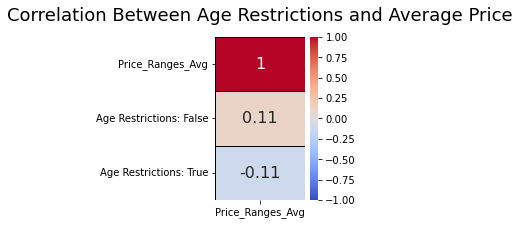

In [10]:
# Features Correlating (Age_Restrictions) with Average Price
Age_Restrictions_Dummies = pd.get_dummies(df['Age_Restrictions'],prefix_sep=': ',prefix='Age Restrictions',drop_first = False)
Age_Restrictions_Dummies = pd.merge(Age_Restrictions_Dummies, df['Price_Ranges_Avg'], left_index=True, right_index=True)
plt.figure(figsize=(2, 3))
heatmap = sns.heatmap(Age_Restrictions_Dummies.corr()[['Price_Ranges_Avg']].sort_values(by='Price_Ranges_Avg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={'fontsize': 16},linewidths = 1,linecolor = 'Black')
heatmap.set_title('Correlation Between Age Restrictions and Average Price', fontdict={'fontsize':18}, pad=16);


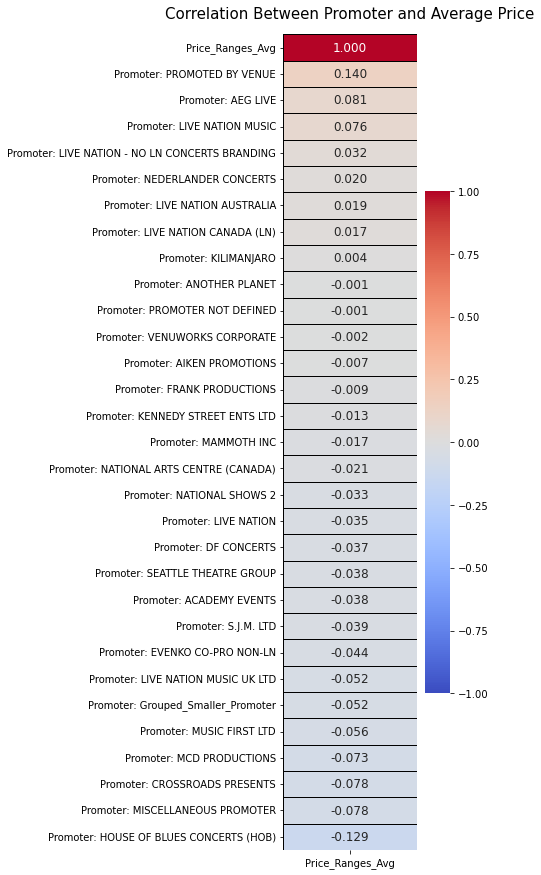

In [11]:
# Features Correlating (Promoter) with Average Price
mask = df.Promoter.map(df.Promoter.value_counts()) < 30
df.Promoter = df.Promoter.mask(mask, 'Grouped_Smaller_Promoter')
Promoter_Dummies = pd.get_dummies(df['Promoter'],prefix_sep=': ',prefix='Promoter',drop_first = False)
Promoter_Dummies = pd.merge(Promoter_Dummies, df['Price_Ranges_Avg'], left_index=True, right_index=True)
plt.figure(figsize=(3, 15))
heatmap = sns.heatmap(Promoter_Dummies.corr()[['Price_Ranges_Avg']].sort_values(by='Price_Ranges_Avg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={'fontsize': 12},linewidths = 0.5,linecolor = 'Black',fmt=".3f")
heatmap.set_title('Correlation Between Promoter and Average Price', fontdict={'fontsize':15}, pad=16);



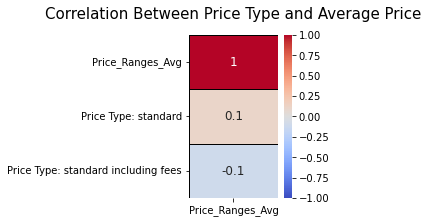

In [12]:
# Features Correlating (Price_Ranges_Type) with Average Price
Price_Ranges_Type_Dummies = pd.get_dummies(df['Price_Ranges_Type'],prefix_sep=': ',prefix='Price Type',drop_first = False)
Price_Ranges_Type_Dummies = pd.merge(Price_Ranges_Type_Dummies, df['Price_Ranges_Avg'], left_index=True, right_index=True)
plt.figure(figsize=(2, 3))
heatmap = sns.heatmap(Price_Ranges_Type_Dummies.corr()[['Price_Ranges_Avg']].sort_values(by='Price_Ranges_Avg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={'fontsize': 12},linewidths = 0.5,linecolor = 'Black')
heatmap.set_title('Correlation Between Price Type and Average Price', fontdict={'fontsize':15}, pad=16);




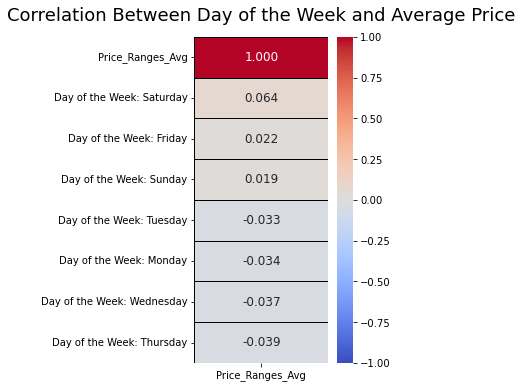

In [13]:
# Features Correlating (Day_of_Week) with Average Price
Day_of_Week_Dummies = pd.get_dummies(df['Day_of_Week'],prefix_sep=': ',prefix='Day of the Week',drop_first = False)
Day_of_Week_Dummies = pd.merge(Day_of_Week_Dummies, df['Price_Ranges_Avg'], left_index=True, right_index=True)
plt.figure(figsize=(3, 6))
heatmap = sns.heatmap(Day_of_Week_Dummies.corr()[['Price_Ranges_Avg']].sort_values(by='Price_Ranges_Avg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={'fontsize': 12},linewidths = 0.5,linecolor = 'Black',fmt=".3f")
heatmap.set_title('Correlation Between Day of the Week and Average Price', fontdict={'fontsize':18}, pad=16);





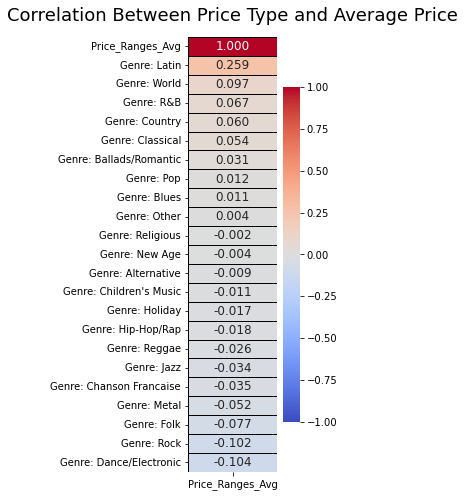

In [14]:
# Features Correlating (Genre_Home) with Average Price
Genre_Home_Dummies = pd.get_dummies(df['Genre_Home'],prefix_sep=': ',prefix='Genre',drop_first = False)
Genre_Home_Dummies = pd.merge(Genre_Home_Dummies, df['Price_Ranges_Avg'], left_index=True, right_index=True)
plt.figure(figsize=(2, 8))
heatmap = sns.heatmap(Genre_Home_Dummies.corr()[['Price_Ranges_Avg']].sort_values(by='Price_Ranges_Avg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={'fontsize': 12},linewidths = 0.5,linecolor = 'Black',fmt=".3f")
heatmap.set_title('Correlation Between Price Type and Average Price', fontdict={'fontsize':18}, pad=16);






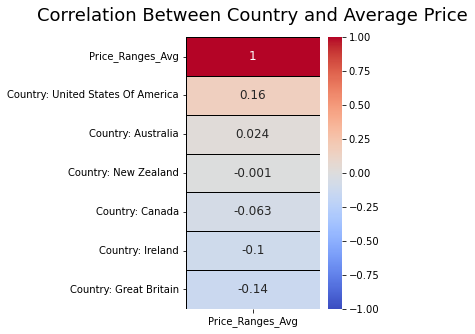

In [15]:
# Features Correlating (Venue_Country) with Average Price
Venue_Country_Dummies = pd.get_dummies(df['Venue_Country'],prefix_sep=': ',prefix='Country',drop_first = False)
Venue_Country_Dummies = pd.merge(Venue_Country_Dummies, df['Price_Ranges_Avg'], left_index=True, right_index=True)
plt.figure(figsize=(3, 5))
heatmap = sns.heatmap(Venue_Country_Dummies.corr()[['Price_Ranges_Avg']].sort_values(by='Price_Ranges_Avg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={'fontsize': 12},linewidths = 0.5,linecolor = 'Black')
heatmap.set_title('Correlation Between Country and Average Price', fontdict={'fontsize':18}, pad=16);

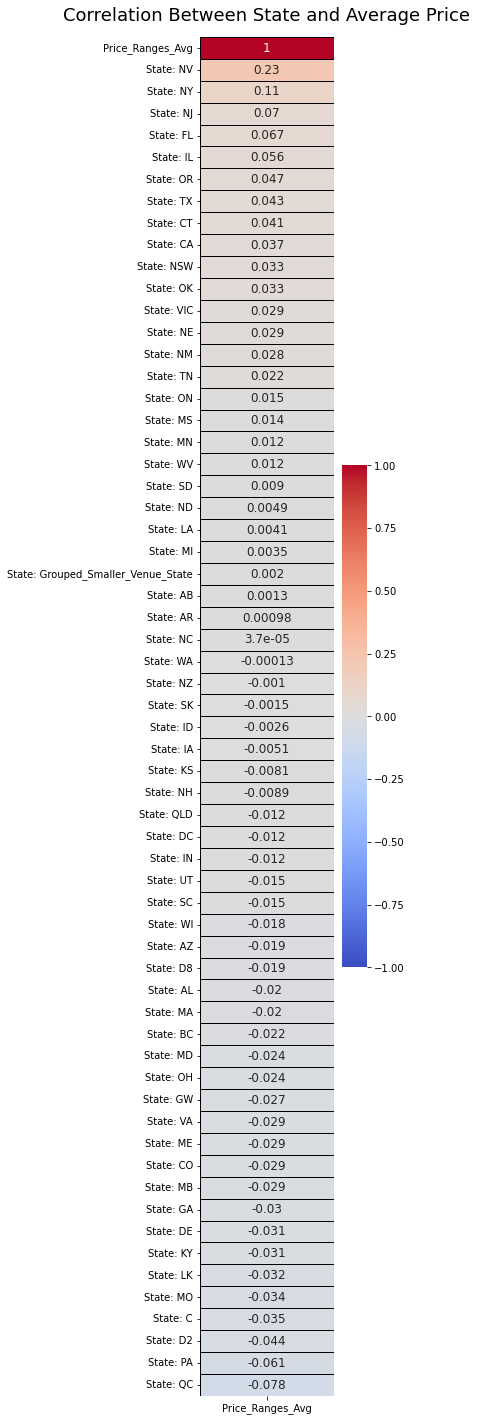

In [16]:
# Features Correlating (Venue_State) with Average Price
mask = df.Venue_State.map(df.Venue_State.value_counts()) < 10
df.Venue_State = df.Venue_State.mask(mask, 'Grouped_Smaller_Venue_State')
Venue_State_Dummies = pd.get_dummies(df['Venue_State'],prefix_sep=': ',prefix='State',drop_first = False)
Venue_State_Dummies = pd.merge(Venue_State_Dummies, df['Price_Ranges_Avg'], left_index=True, right_index=True)
plt.figure(figsize=(3, 25))
heatmap = sns.heatmap(Venue_State_Dummies.corr()[['Price_Ranges_Avg']].sort_values(by='Price_Ranges_Avg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={'fontsize': 12},linewidths = 0.5,linecolor = 'Black')
heatmap.set_title('Correlation Between State and Average Price', fontdict={'fontsize':18}, pad=16);

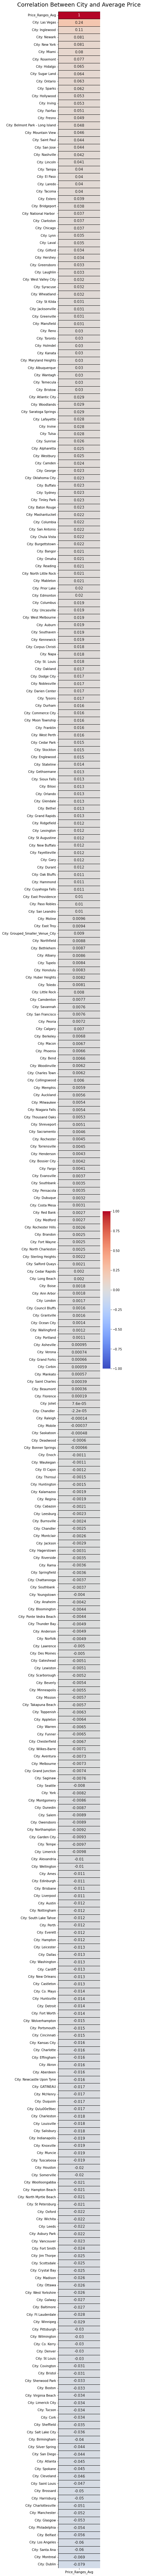

In [17]:
# Features Correlating (Venue_City) with Average Price
mask = df.Venue_City.map(df.Venue_City.value_counts()) < 5
df.Venue_City = df.Venue_City.mask(mask, 'Grouped_Smaller_Venue_City')
Venue_City_Dummies = pd.get_dummies(df['Venue_City'],prefix_sep=': ',prefix='City',drop_first = False)
Venue_City_Dummies = pd.merge(Venue_City_Dummies, df['Price_Ranges_Avg'], left_index=True, right_index=True)
plt.figure(figsize=(3, 150))
heatmap = sns.heatmap(Venue_City_Dummies.corr()[['Price_Ranges_Avg']].sort_values(by='Price_Ranges_Avg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={'fontsize': 12},linewidths = 0.5,linecolor = 'Black')
heatmap.set_title('Correlation Between City and Average Price', fontdict={'fontsize':18}, pad=16);

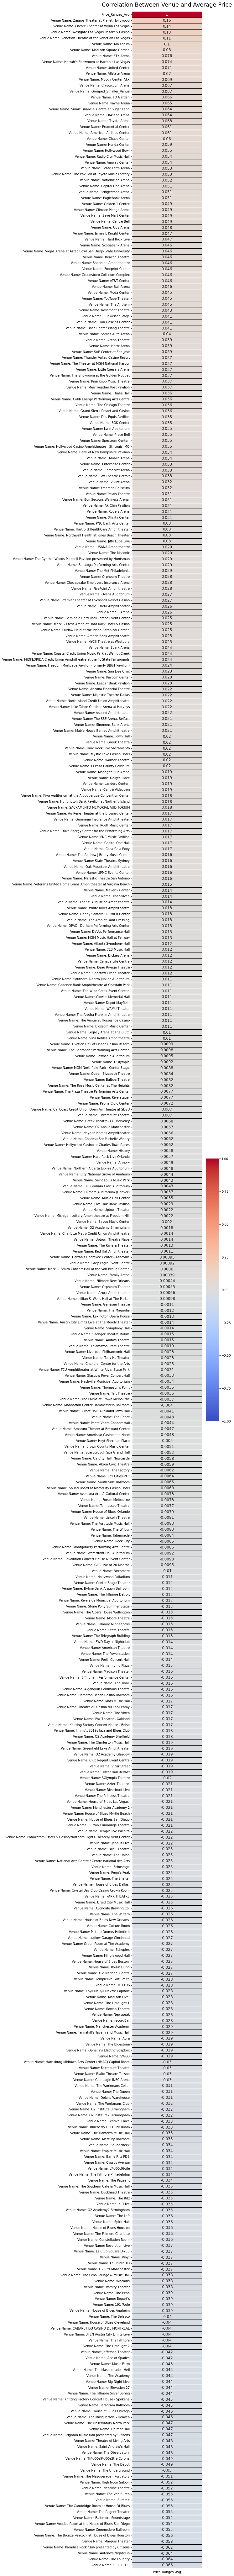

In [18]:
# Features Correlating (Venue) with Average Price
mask = df.Venue.map(df.Venue.value_counts()) < 9
df.Venue = df.Venue.mask(mask, 'Grouped_Smaller_Venue')
Venue_Dummies = pd.get_dummies(df['Venue'],prefix_sep=': ',prefix='Venue Name',drop_first = False)
Venue_Dummies = pd.merge(Venue_Dummies, df['Price_Ranges_Avg'], left_index=True, right_index=True)
plt.figure(figsize=(5, 150))
heatmap = sns.heatmap(Venue_Dummies.corr()[['Price_Ranges_Avg']].sort_values(by='Price_Ranges_Avg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={'fontsize': 12},linewidths = 0.5,linecolor = 'Black')
heatmap.set_title('Correlation Between Venue and Average Price', fontdict={'fontsize':18}, pad=16);







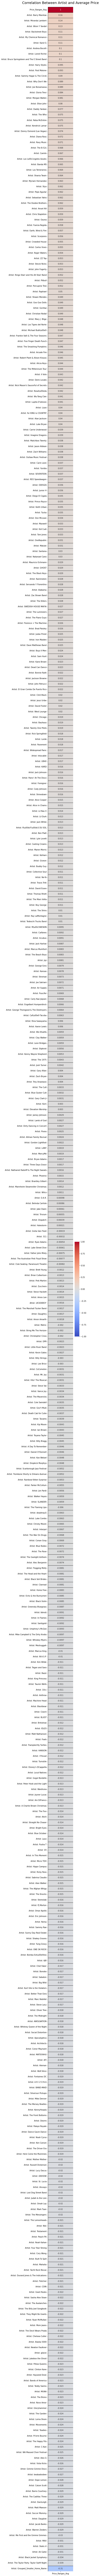

In [19]:
# Features Correlating (Home_Name) with Average Price
mask = df.Home_Name.map(df.Home_Name.value_counts()) < 8
df.Home_Name = df.Home_Name.mask(mask, 'Grouped_Smaller_Home_Name')
Home_Name_Dummies = pd.get_dummies(df['Home_Name'],prefix_sep=': ',prefix='Artist',drop_first = False)
Home_Name_Dummies = pd.merge(Home_Name_Dummies, df['Price_Ranges_Avg'], left_index=True, right_index=True)
plt.figure(figsize=(3, 250))
heatmap = sns.heatmap(Home_Name_Dummies.corr()[['Price_Ranges_Avg']].sort_values(by='Price_Ranges_Avg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm',annot_kws={'fontsize': 10},linewidths = 0.5,linecolor = 'Black')
heatmap.set_title('Correlation Between Artist and Average Price', fontdict={'fontsize':18}, pad=16);